# Coronavirus 
___
Coronavirus COVID-19 (2019-nCoV)  
COVID-19 Data for South Africa
### About Notebook
The goal here is to explore data for Coronavirus spread in South Africa, this notebook will be updated as time goes, Site to know more about Coronavirus https://www.who.int/health-topics/coronavirus

___
### Load Packages
Let's load packages that we need to achieve the goal above

In [1]:
import os
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime
from textwrap import wrap
### NOTE: `conda install basemap`
import conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.options.display.max_colwidth = 100

### Data 
___
Let's check the data, we may have multiple files in the data directory 

In [2]:
os.listdir('../data')

['LICENSE.md', 'covid19za_timeline_confirmed.csv', 'README.md']

We have one CSV file that the data, let's use this data

### Load data
___
Let's load data 

In [3]:
df = pd.read_csv('../data/covid19za_timeline_confirmed.csv')

### Partial View of Data
___
Let's see how the data is formatted

In [4]:
df.head()

,case_id,date,YYYYMMDD,country,province,geo_subdivision,age,gender,transmission_type
0,1,05-03-2020,20200305,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy
1,2,07-03-2020,20200307,South Africa,GP,ZA-GP,39.0,female,Travelled to Italy
2,3,08-03-2020,20200308,South Africa,KZN,ZA-KZN,NaN,female,Travelled to Italy
3,4,09-03-2020,20200309,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy
4,5,09-03-2020,20200309,South Africa,KZN,ZA-KZN,38.0,female,Travelled to Italy


### Conversion 
___
Let's convert data to the correct data type, we will only convert `date` at the moment, Age has missing values so that cannot be converted at the moment 

In [5]:
df['date'] = df.apply(lambda x: datetime.strptime(x['date'], '%d-%m-%Y').date(), axis=1)

### Age Group
___
Let's create age group column to use it for further analysis

In [6]:
bins = [17, 18, 30, 40, 50, 60, 70, 80]
labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['age_group'] = pd.cut(df.age, bins, labels = labels, include_lowest = True)

### Visualizations
___
Graphs are better to use and explain, let's viusalize our data

In [7]:
df.head()

,case_id,date,YYYYMMDD,country,province,geo_subdivision,age,gender,transmission_type,age_group
0,1,2020-03-05,20200305,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy,30-39
1,2,2020-03-07,20200307,South Africa,GP,ZA-GP,39.0,female,Travelled to Italy,30-39
2,3,2020-03-08,20200308,South Africa,KZN,ZA-KZN,NaN,female,Travelled to Italy,NaN
3,4,2020-03-09,20200309,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy,30-39
4,5,2020-03-09,20200309,South Africa,KZN,ZA-KZN,38.0,female,Travelled to Italy,30-39


In [23]:
def vertical_bar_chart(df, x, y, label, sort, figsize=(13, 9), ascending=True):
    """
    This customize vertical bar chart from seaborn(sns as aliased above) 
    Args:
        df: dataframe 
        x: x-axis column 
        y: y-axis column
        label: string to label the graph
        figsize: figure size to make chart small or big
        ascending: ascending order from smallest to biggest
        sort: which column to sort by 
        
    Returns:
        None
    """
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=figsize)
    #sns.set_color_codes(sns.color_palette(["#0088c0"]))
    # Text on the top of each barplot
    ax = sns.barplot(x=x, y=y, data=df.sort_values(sort, ascending=ascending),
            label=label, color="b", palette=["#0088c0"])
    
    total = df[y].sum()
    for p in ax.patches:
        ax.annotate(str(format(p.get_height()/total * 100, '.2f')) + '%' + ' (' + str(int(p.get_height())) + ')', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), textcoords = 'offset points')
    
    y_value=['{:,.0f}'.format(x/total * 100) + '%' for x in ax.get_yticks()]
    plt.yticks(list(plt.yticks()[0]) + [10])
    ax.set_yticklabels(y_value)
    plt.xlabel('')
    plt.ylabel('')
    sns.despine(left=True, bottom=True)
    
def horizontal_bar_chart(df, x, y, label, figsize=(16, 16)):
    """
    This customize horizontal bar chart from seaborn(sns as aliased above) 
    Args:
        df: dataframe 
        x: x-axis column 
        y: y-axis column
        label: string to label the graph
        figsize: figure size to make chart small or big
        
    Returns:
        None
    """
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.barplot(x=x, y=y, data=df,
            label=label, color="b", palette=["#0088c0"])
    total = df.values[:, 1].sum()
    for i, v in enumerate(df.values[:, 1]):
        ax.text(v + 0.1, i + .25, str(format(v / total * 100, '.2f')) + '% (' + str(v) + ')')
        
    labels = [ '\n'.join(wrap(l, 20)) for l in df.values[:, 0]]
    ax.set_yticklabels(labels)
    x_value=['{:,.0f}'.format(x/total * 100) + '%' for x in ax.get_xticks()]
    plt.xticks(list(plt.xticks()[0]) + [10])
    ax.set_xticklabels(x_value)
    plt.ylabel('')
    plt.xlabel('')
    sns.despine(left=True, bottom=True)
    
def line_graph(df, column, figsize=(12, 8)):
    """
    This customize line chart from matplotlib(plt as aliased above) 
    Args:
        df: dataframe 
        column: x-axis column
        label: string to label the graph
        figsize: figure size to make chart small or big
        
    Returns:
        None
    """
    fig, ax = plt.subplots(figsize=figsize)
    line_data = df[column].value_counts().reset_index().sort_values(by='index')
    line_data['Cumulative Frequency'] = line_data[column].cumsum()
    line_data.plot(x='index', y=column, style='o-', ax=ax, label='Daily Infection')
    line_data.plot(x='index', y='Cumulative Frequency', style='ro-', ax=ax)
    plt.xticks(rotation=90)
    plt.xlabel('')
    

def pie_chart(df, column):
    """
    This customize pie chart from matplotlib(plt as aliased above) 
    Args:
        df: dataframe 
        column: x-axis column
        label: string to label the graph
        figsize: figure size to make chart small or big
        
    Returns:
        None
    """
    X = df[column].value_counts()
    colors = ['#0088C0', '#82DAFF']
    plt.pie(X.values, labels=X.index, colors=colors,
            startangle=90,
            explode = (0, 0),
            textprops={'fontsize': 14},
            autopct = '%1.2f%%')
    plt.axis('equal')
    plt.show()

___
### Age group 
Let's see age groups that infected by Coronavirus

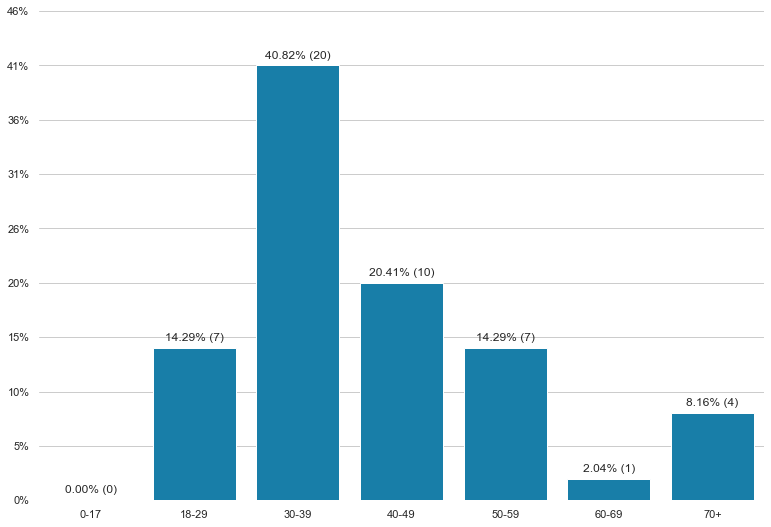

In [16]:
vertical_bar_chart(df['age_group'].value_counts().reset_index(), 'index', 'age_group', 'Age distribution', 'index')

#### Coronavirus infection
The Age group that is mostly infected is between **30 - 39**, note that from between age of **30 - 59** it is about **~83%** infected

___
### Daily infections
Let's See how the virus is spreading by day

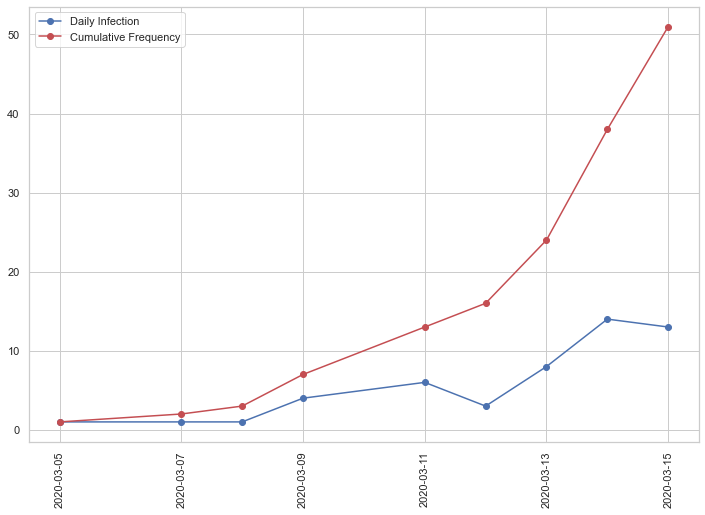

In [24]:
line_graph(df, 'date')

### Testing
Cummulative number of people testing Coronavirus Daily

In [ ]:
line_graph(df, 'Cummulative')

### Gender
Let's see which gender has more 

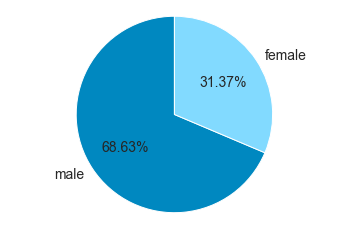

In [26]:
pie_chart(df, 'gender')

**60%** of infected individuals are Males and **40%** are Females
___

### Province 
Lets see provinces that are affected by Coronavirus

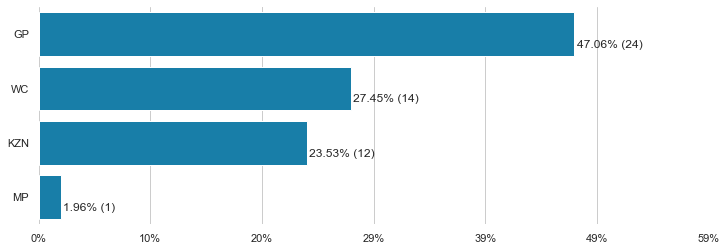

In [32]:
horizontal_bar_chart(df['province'].value_counts().reset_index(), 'province', 'index', 'Province', figsize=(12, 4))

**Gauteng** is leading in terms of reported cases, that makes sense since lot of people are using OR Tambo International Airpot
___

### Country 
Let's see which country they travel for before coming to South Africa

In [33]:
df['transmission_type'] = df['transmission_type'].apply(lambda x: 
                              x.replace('Travelled to ', '')\
                              .replace(' and', ';')\
                              .replace('Visiting resident of ', '')\
                              .replace(' travelled to', ';'))

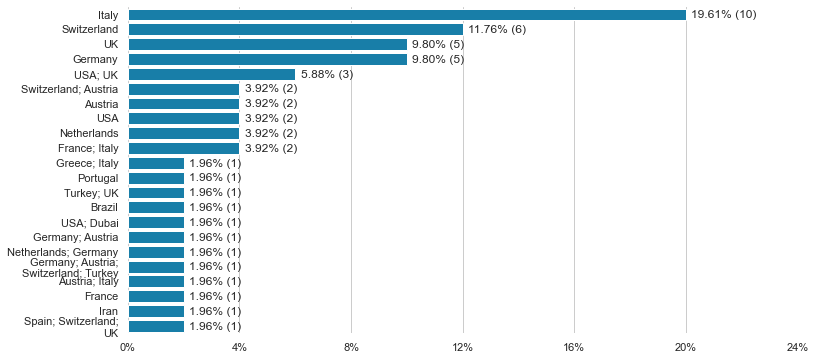

In [34]:
horizontal_bar_chart(df['transmission_type'].value_counts().reset_index(), 'transmission_type', 
                     'index', 'Country', figsize=(12, 6))

### Note
Lot of people seems like they got infected by a virus in Itali, It seems like they pass through Italy first  and there is also lot of interactions happens in Itali and Austria
___

## Netwok for pathways
Lets plot the network path for their trips(In Progress)

In [205]:
### Hardcoded For now to simulate use of maps
#### COUNTRIES ####
countries = {'Italy':[43.725024,11.2811671], 
             'Germany':[51.0899106,5.9680313], 
             'France':[48.8588377,2.2770202], 
             'Iran':[30.3803868,53.529223],
             'Austria':[47.6746139,11.1029246], 
             'Portugal':[36.8806296,-27.8264481], 
             'Switzerland':[46.8077141,7.1031419], 
             'Turkey':[39.0014579,30.6870245], 
             'UK':[54.9064775,-1.8394631], 
             'Netherlands':[52.1917335,3.0368486], 
             'Brazil':[-13.7021113,-69.6954807],
             'USA':[38.4638898,-93.6771245],
             'Dubai': [25.2048635,55.2007198],
             'Spain': [40.4378698,-3.8196211],
             'Canada': [50.8272431,-130.1232779],
             'Mexico': [23.2935312,-111.6488566],
             'Greece':[39.0742, 21.8243]}
#### Provinces in South Africa ####
province = {'KZN':[-28.5306, 30.8958], 
            'GP':[-26.2708, 28.1123], 
            'WC':[-33.2278, 21.8569], 
            'MP':[-25.5653, 30.5279],
            'LIM':[-23.4013, 29.4179]
           }

In [206]:
pd.concat([pd.DataFrame([{'country': key, 'longitude':countries[key][0], 'latitude': countries[key][1]} for key in countries.keys()]), 
           pd.DataFrame([{'country': key, 'longitude':province[key][0], 'latitude': province[key][1]} for key in province.keys()])])

,country,longitude,latitude
0,Italy,43.725024,11.281167
1,Germany,51.089911,5.968031
2,France,48.858838,2.277020
3,Iran,30.380387,53.529223
4,Austria,47.674614,11.102925
5,Portugal,36.880630,-27.826448
6,Switzerland,46.807714,7.103142
7,Turkey,39.001458,30.687024
8,UK,54.906478,-1.839463
9,Netherlands,52.191733,3.036849


In [194]:
def Globetrotting(G,Start_Airport,Must_go=[],Dont_go=[]):
    Start = Start_Airport
    sites = []
    Continents = ['Italy','Germany','Austria','Portugal','Switzerland','Turkey', 'UK', 
                  'USA', 'Greece', 'KZN', 'GP', 'WC', 'MP']
    st_continent = G.nodes[Start]['Dest']
    Continents.remove(st_continent)
    i = 0
    n = len(Must_go)
    while (len(Continents)+len(Must_go) > 0):
        pos_nodes = [x for x,y in G.nodes(data=True) if (y['Dest'] in Continents)]
        pos_nodes = pos_nodes + Must_go
        pos_nodes = [x for x in pos_nodes if x not in Dont_go]
        pos_dest = nx.single_source_dijkstra(G,Start,weight='Distance')[0]
        del pos_dest[Start]
        pos_dest = {key: value for key, value in pos_dest.items() if key in pos_nodes}
        if len(pos_dest) > 0:
            final_dest = min(pos_dest,key=pos_dest.get)
            sites.append(final_dest) # append
            if G.nodes[final_dest]['Dest'] in Continents:
                Continents.remove(G.nodes[final_dest]['Dest'])
            if final_dest in Must_go:
                Must_go.remove(final_dest)
            Start = final_dest
        else:
            print("Sorry, the schedule cannot be finished...")
            break
        i += 1
        if i-n == 50:
            print("Sorry, there are some errors that we cannot find the right solutions")
            break
    sites = [Start_Airport]+sites+[Start_Airport]
    return sites

In [207]:
path = []
path_route = []
for index, row in df.iterrows():
    if ';' in row['transmission_type']:
        path_route.append([row['transmission_type'].split('; '),  row['province']])
    else:
        path.append({'Source': row['transmission_type'],'Dest': row['province'],
                    'Source_Lat': countries[row['transmission_type']][0], 
                    'Source_Lon': countries[row['transmission_type']][1],
                    'Dest_Lat': province[row['province']][0],
                    'Dest_Lon': province[row['province']][1]
                    })

In [208]:
path_route

[[['Austria', 'Italy'], 'GP'],
 [['Germany', 'Austria', 'Switzerland', 'Turkey'], 'WC'],
 [['Turkey', 'UK'], 'KZN'],
 [['Switzerland', 'Austria'], 'GP'],
 [['Greece', 'Italy'], 'KZN'],
 [['Switzerland', 'Austria'], 'WC'],
 [['USA', 'UK'], 'GP'],
 [['USA', 'UK'], 'GP'],
 [['USA', 'UK'], 'GP'],
 [['Netherlands', 'Germany'], 'GP'],
 [['France', 'Italy'], 'GP'],
 [['France', 'Italy'], 'WC'],
 [['USA', 'Dubai'], 'WC'],
 [['Germany', 'Austria'], 'WC'],
 [['Spain', 'Switzerland', 'UK'], 'WC']]

In [209]:
path_route

[[['Austria', 'Italy'], 'GP'],
 [['Germany', 'Austria', 'Switzerland', 'Turkey'], 'WC'],
 [['Turkey', 'UK'], 'KZN'],
 [['Switzerland', 'Austria'], 'GP'],
 [['Greece', 'Italy'], 'KZN'],
 [['Switzerland', 'Austria'], 'WC'],
 [['USA', 'UK'], 'GP'],
 [['USA', 'UK'], 'GP'],
 [['USA', 'UK'], 'GP'],
 [['Netherlands', 'Germany'], 'GP'],
 [['France', 'Italy'], 'GP'],
 [['France', 'Italy'], 'WC'],
 [['USA', 'Dubai'], 'WC'],
 [['Germany', 'Austria'], 'WC'],
 [['Spain', 'Switzerland', 'UK'], 'WC']]

In [210]:
travel = pd.DataFrame(path)

In [198]:
travel

,Source,Dest,Source_Lat,Source_Lon,Dest_Lat,Dest_Lon
0,Italy,KZN,43.725024,11.281167,-28.5306,30.8958
1,Italy,GP,43.725024,11.281167,-26.2708,28.1123
2,Italy,KZN,43.725024,11.281167,-28.5306,30.8958
3,Italy,KZN,43.725024,11.281167,-28.5306,30.8958
4,Italy,KZN,43.725024,11.281167,-28.5306,30.8958
5,Italy,KZN,43.725024,11.281167,-28.5306,30.8958
6,Italy,KZN,43.725024,11.281167,-28.5306,30.8958
7,Italy,GP,43.725024,11.281167,-26.2708,28.1123
8,Germany,GP,51.089911,5.968031,-26.2708,28.1123
9,Germany,GP,51.089911,5.968031,-26.2708,28.1123


In [199]:
G = nx.from_pandas_edgelist(travel,'Source','Dest',create_using=nx.DiGraph())

In [200]:
nx.set_node_attributes(G,travel.Source_Lat.copy().to_dict(),'Latitude')
nx.set_node_attributes(G,travel.Source_Lon.copy().to_dict(),'Longitude')
nx.set_node_attributes(G,travel.Dest.copy().to_dict(),'Dest')

In [91]:
nx.dijkstra_path(G,source='Germany',target='GP')

['Germany', 'GP']

In [92]:
G.nodes['GP']

{}

In [93]:
nx.dijkstra_path(G,source='Germany',target='GP')

['Germany', 'GP']

In [94]:
# sites = Globetrotting(G = G,Start_Airport='Germany')
# sites_pairs = [(x,y) for x, y in itertools.zip_longest(sites, sites[1:])]
# sites_pairs = sites_pairs[:-1]

In [215]:
travel[travel.Source == 'USA']

,Source,Dest,Source_Lat,Source_Lon,Dest_Lat,Dest_Lon
11,USA,MP,38.46389,-93.677125,-25.5653,30.5279
12,USA,GP,38.46389,-93.677125,-26.2708,28.1123


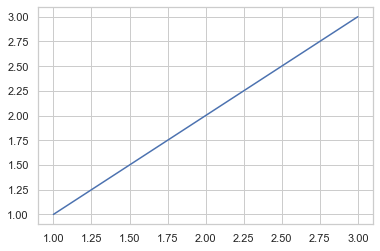

In [219]:
plt.plot([1, 2, 3], [1, 2, 3])

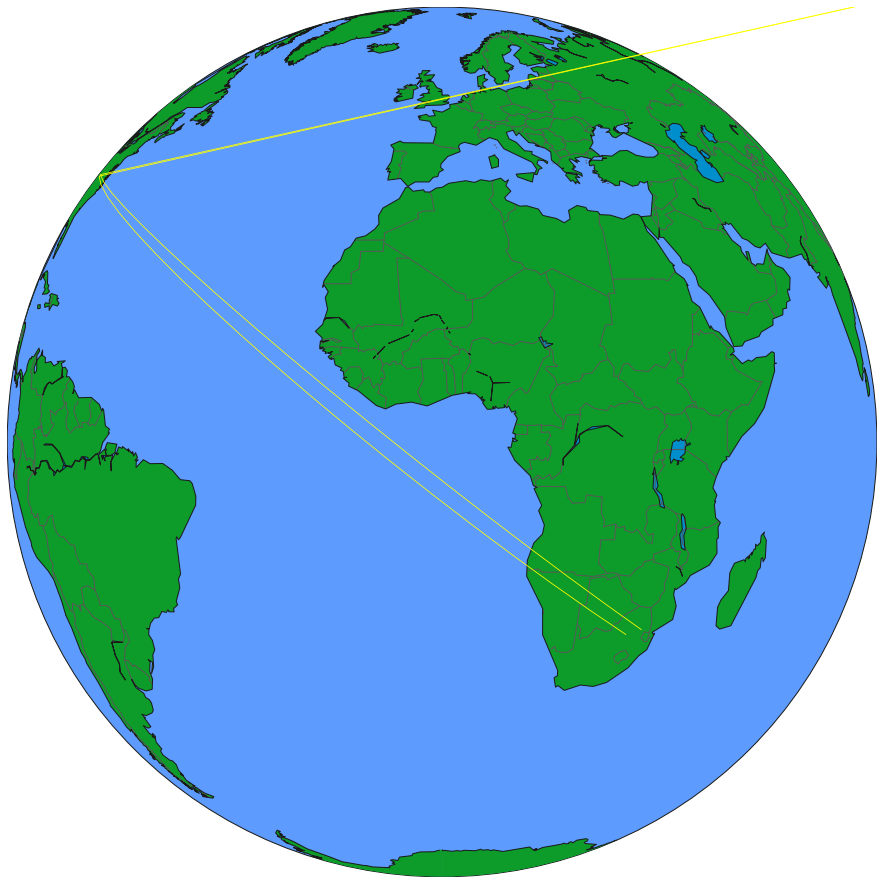

In [220]:
plt.figure(figsize=(16,16))
map = Basemap(projection='ortho', lat_0=0, lon_0=0)
map.drawmapboundary(fill_color='#5D9BFF')
map.fillcontinents(color='#0D9C29',lake_color='#008ECC')
map.drawcountries(color='#585858',linewidth=1)
map.drawcoastlines()
colors = ['yellow', 'yellow']
colors = ['red', 'red']
# for item in ['USA', 'Italy']:
for index, row in travel[travel.Source == 'USA'].iterrows():
    x2, y2 = map.gcpoints(row["Source_Lon"], row["Source_Lat"], row["Dest_Lon"], row["Dest_Lat"], 20)
    if item == 'Italy':
        plt.plot(x2,y2,color='yellow',linewidth=0.8)
    else:
        plt.plot(x2,y2,color='red',linewidth=0.8)
plt.show()
plt.show()

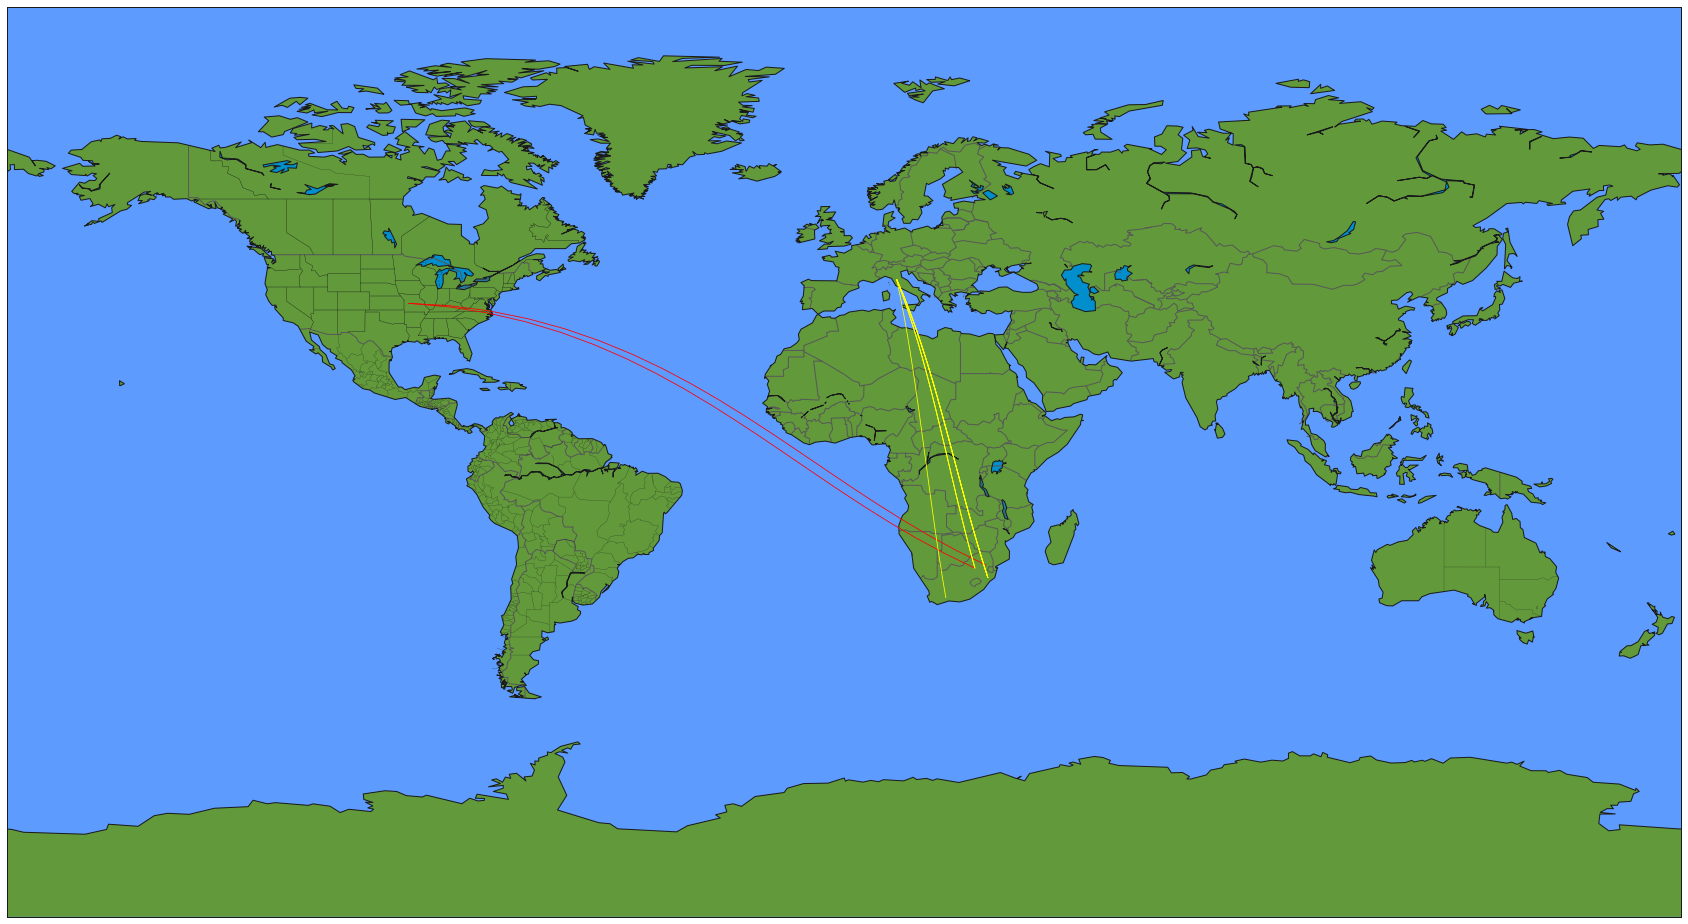

In [213]:
plt.figure(figsize = (30,30))
m = Basemap(projection='gall')
m.fillcontinents(color="#61993b",lake_color="#008ECC")
m.drawmapboundary(fill_color="#5D9BFF")
m.drawcountries(color='#585858',linewidth = 1)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=1)
colors = ['yellow', 'yellow']
colors = ['red', 'red']
for item in ['USA', 'Italy']:
    for index, row in travel[travel.Source == item].iterrows():
        x2, y2 = m.gcpoints(row["Source_Lon"], row["Source_Lat"], row["Dest_Lon"], row["Dest_Lat"], 20)
        if item == 'Italy':
            plt.plot(x2,y2,color='yellow',linewidth=0.8)
        else:
            plt.plot(x2,y2,color='red',linewidth=0.8)
        #plt.annotate(x2, y2, )
plt.show()